# 이웃집 토토치 파이토치 : Day 2_답지

📢 해당 게시물은 파이토치 공식 튜토리얼 중 [신경망 모델 구성하기](https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html)를 읽고 직접 작성해보는 실습 노트북입니다.

In [ ]:
!pip install torchviz
!pip install torchsummary

# 신경망 모델 구성하기

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot
from torchsummary import summary
import torch.nn.functional as F

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 클래스 정의하기

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## 예측하기

In [4]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9])


## 모델 시각화 하기

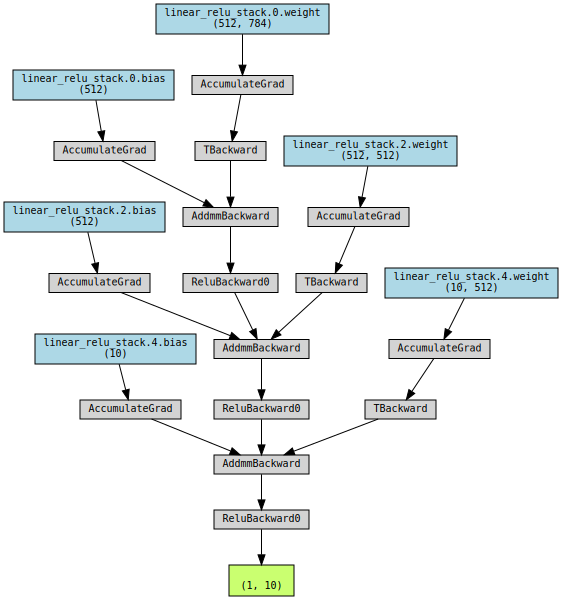

In [5]:
make_dot(model(X), params=dict(list(model.named_parameters())))

In [6]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
              ReLU-7                   [-1, 10]               0
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


### 모델 계층 (Layer)

모델 계층을 시각화하면 위와 비슷한 양상을 보입니다.

In [7]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [8]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [9]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [10]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1101, -0.0700, -0.4326, -0.2243, -0.0071, -0.1594, -0.1028,  0.1246,
          0.3051, -0.2566,  0.2137, -0.5298,  0.3714,  0.3406,  0.3178, -0.0621,
         -0.0897,  0.0969, -0.5715, -0.0043],
        [ 0.1776,  0.2296, -0.2408, -0.0764,  0.1124, -0.0159,  0.0540, -0.2374,
          0.2966, -0.3143,  0.1269, -0.2298,  0.1643, -0.2227,  0.2849,  0.2178,
         -0.5390, -0.3423, -0.1857,  0.1348],
        [ 0.1972,  0.0058, -0.0146, -0.0507, -0.5078,  0.5121, -0.0614, -0.2828,
          0.3642, -0.3150,  0.2033, -0.4041,  0.0904, -0.1624,  0.6379,  0.0060,
         -0.1300, -0.4090, -0.2239, -0.3424]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.1101, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1246, 0.3051,
         0.0000, 0.2137, 0.0000, 0.3714, 0.3406, 0.3178, 0.0000, 0.0000, 0.0969,
         0.0000, 0.0000],
        [0.1776, 0.2296, 0.0000, 0.0000, 0.1124, 0.0000, 0.0540, 0.0000, 0.2966,
         0.0000, 0.1269, 0.0000, 0.1643, 0.0000, 0.284

## 실습 내용 (CNN)

### 정답지

In [11]:
class Net(nn.Module):
    ###############################
    #   밑줄 친 곳을 채워주세요!  #
    # 모델을 시각화한 그래프 참고 #
    ###############################

    def __init__(self):
        super(Net, self).__init__()
        # 입력 이미지 채널 1개, 출력 채널 32개, 커널 3x3, stride 1, padding= 1의 Conv layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 입력 이미지 채널 32개, 출력 채널 64개, 커널 3x3, stride 1, padding= 1의 Conv layer
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        # 7*7은 이미지 차원에 해당
        self.fc1 = nn.Linear(64 * 7 * 7, 120, bias=True) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # (2, 2) 크기 윈도우에 대해 맥스 풀링(max pooling)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### 깔끔한 방법

In [12]:
class Net2(nn.Module):
    ###############################
    #   밑줄 친 곳을 채워주세요!  #
    # 모델을 시각화한 그래프 참고 #
    ###############################

    def __init__(self):
        super(Net2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.layer3 = nn.Sequential(
            nn.Linear(64 * 7 * 7, 120, bias=True),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU())
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = torch.flatten(x, 1) 
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.fc3(x)
        return x

net = Net2()
print(net)

Net2(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=3136, out_features=120, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
  )
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


C:\Users\pebpung\anaconda3\envs\torch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


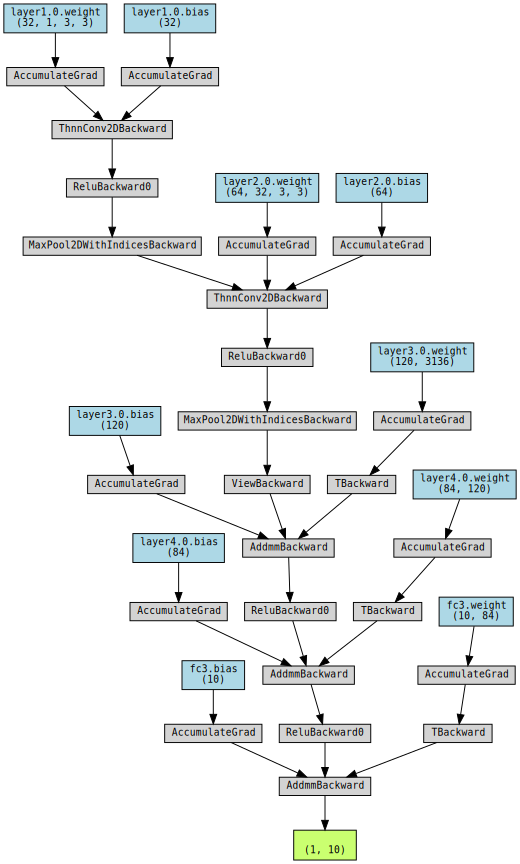

In [13]:
X = torch.rand(1, 1, 28, 28, device=device)
make_dot(net(X), params=dict(list(net.named_parameters())))

In [14]:
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 120]         376,440
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 406,270
Trainable params: 406,270
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

## 실습 내용 (VGG16)

![img](./img/vgg16.png)

## Class 정의하기

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv = nn.Sequential(
            ###############################
            # Sequential 셀을 채워주세요! #
            ###############################
        )
        self.avg_pool = nn.AvgPool2d(3)
        self.fc1 = nn.Linear(512*2*2,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,10)
        

    def forward(self, x):
        ###############################
        #   forward 셀을 채워주세요!  #
        ###############################
        return x

model = VGG16()
print(model)

In [ ]:
X = torch.rand(1, 3, 224, 224, device=device)
summary(model, (3, 224, 224))